# INFO 213: Data Science Programming 2
___

### Week 9: Decision Tree and Random Forests
___

### 9:30-10:50am, Mon., August 20 and Wed., August 22, 2018
---

**Question:**
- How to build tree structures for classification?


**Objectives:**
- Explain the principle of decision tree classification
- Describe a simple greedy method for selecting decision node
- Build decision tree classifier using Scikit Learn package
- Describe the overfitting issue with decision tree
- Build random forests classifier using Scikit Learn package

# Decision Trees

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:
![](decision-tree.png)

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
The trick, of course, comes in deciding which questions to ask at each step.
In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.
Let's now look at an example of this.

### Entropy

In order to build a decision tree, we will need to decide what questions to ask and in
what order. 


Ideally, we’d like to choose questions whose answers give a lot of information about
what our tree should predict. 

We capture this notion of “how much information” with entropy. We use it to represent the uncertainty associated
with data.

Imagine that we have a set S of data, each member of which is labeled as belonging to
one of a finite number of classes C1, ..., Cn. If all the data points belong to a single
class, then there is no real uncertainty, which means we’d like there to be low entropy.
If the data points are evenly spread across the classes, there is a lot of uncertainty and
we’d like there to be high entropy.

In math terms, if pi is the proportion of data labeled as class ci, we define the entropy
as:

$H(S) = − p_{1} \log_{2} p_{1} − ... − p_{n} log_{2} p_{n}$

with the (standard) convention that 0 log 0 = 0.

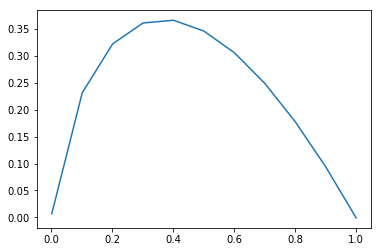

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.arange(0.001, 1.1, 0.1)
ys = -xs * np.log(xs)

plt.plot(xs, ys)

In [2]:
-0.5*np.log(0.5)

0.34657359027997264

### The Entropy of a Partition

What we’ve done so far is compute the entropy (think “uncertainty”) of a single set of
labeled data. Now, each stage of a decision tree involves asking a question whose
answer partitions data into one or (hopefully) more subsets. 

Mathematically, if we partition our data S into subsets $S_{1}$, ..., $S_{m}$ containing proportions
$q_{1}$, ..., $q_{m}$ of the data, then we compute the entropy of the partition as a weighted
sum:

$H = q_{1}H(S_{1}) + . . . + q_{m}H(S_{m})$

### ID3 Algrithm

The traditional ID3 algorithm builds a decision tree in the following manner.

Let’s say we’re given some labeled data, and a list of attributes to consider branching
on.
* If the data all have the same label, then create a leaf node that predicts that label and then stop.
* If the list of attributes is empty (i.e., there are no more possible questions to ask), then create a leaf node that predicts the most common label and then stop.
* Otherwise, try partitioning the data by each of the attributes
* Choose the partition with the lowest partition entropy
* Add a decision node based on the chosen attribute
* Recur on each partitioned subset using the remaining attributes

### Creating a decision tree


A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.

In [6]:
import pandas as pd
tennis = pd.read_csv("decision-tree-tennis-example.csv", delimiter = "\t")

In [7]:
tennis

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


## Excercise 
Run the ID3 algorithm on the tennis data

## scikit-learn package
scikit-learn includes DecisionTreeClassifier that is a class capable of performing multi-class classification on a dataset.

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

## Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the ``RandomForestClassifier`` estimator, which takes care of all the randomization automatically.
All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

## Example: Random Forest for Classifying Digits

We have taken a quick look at the hand-written digits data.
Let's use that again here to see how the random forest classifier can be used in this context.

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

To remind us what we're looking at, we'll visualize the first few data points:

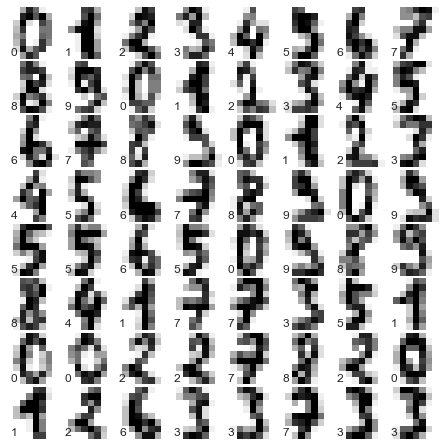

In [15]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a random forest as follows:

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We can take a look at the classification report for this classifier:

In [19]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix:

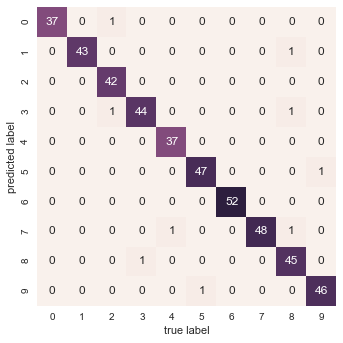

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

## Summary of Random Forests

Random forests are a powerful ensemble method with several advantages:

- Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
- The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the ``predict_proba()`` method).
- The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the *meaning* of the classification model, random forests may not be the best choice.